In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/Users/lucreziavaleriani/Desktop/PDO61_chr1820.csv",
                   sep = ',') 
data['pos'] = range(1, len(data) + 1)
data['median_baf'] = data['median_baf'].apply(lambda x: 1 - x if x > 0.5 else x)
data = data[data['median_baf']>0]

tmp_csv = '/Users/lucreziavaleriani/Desktop/tmp.csv'
test_df = pd.DataFrame({"baf":data.median_baf, "dr":data.median_dr, "pos":data.pos})
test_df.to_csv(path_or_buf=tmp_csv, sep=",")

In [60]:
# tmp_csv = '/Users/lucreziavaleriani/Desktop/tmp.csv'
# test_df = pd.DataFrame({"vaf":snv.vaf, "baf":snp.baf, "dr":snp.dr, "pos":snv.pos, "cna_id":snp.CN_1})
# test_df.to_csv(path_or_buf=tmp_csv, sep=",")

In [4]:
from locate.segmentation.multivariate_clasp import MultivariateClaSP
multiClasp = MultivariateClaSP(tmp_csv, 
                               mode='sum', 
                               out_dir='/Users/lucreziavaleriani/Desktop/sm/', 
                               threshold=1e-10, 
                               window_size=50,
                               cna_id = None,
                               frequencies = ['baf', 'dr'])
multiClasp.analyze_time_series()

/Users/lucreziavaleriani/Documents/GitHub/locate/src/locate/segmentation/claspy/nearest_neighbour.py:240: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  start, end = pranges[idx]


In [1]:
multiClasp.all_cps

NameError: name 'multiClasp' is not defined

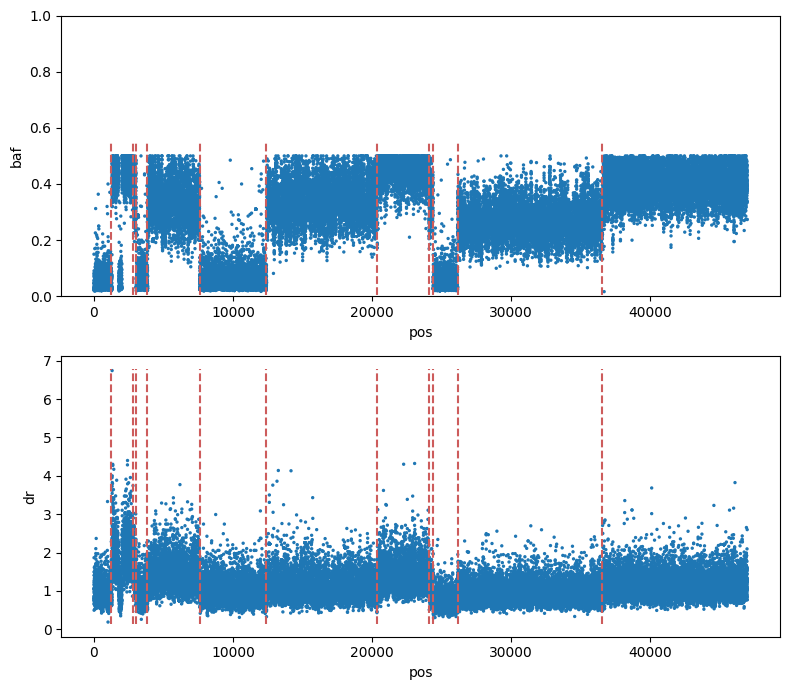

In [41]:
multiClasp.plot_results(save=False)